## USING THE PYCARET LIBARAY 

In [1]:
##pip install pycaret

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("labels_oneHot_encoding.csv")

## MODEL CREATION FOR GENDER 

In [3]:
df.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df = df.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [5]:
df.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,gender
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,1
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,1
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,1
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,1
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,1


In [6]:
df['gender'].value_counts()

1    720
0    720
Name: gender, dtype: int64

In [7]:
from pycaret.classification import *
clf = setup(data = df, target = 'gender')

,Description,Value
0,Session id,4309
1,Target,gender
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [8]:
## COMAPRING MODELs 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9851,0.9964,0.9800,0.9900,0.9849,0.9702,0.9704,2.4830
ridge,Ridge Classifier,0.9841,0.0000,0.9780,0.9900,0.9839,0.9682,0.9684,2.0500
lda,Linear Discriminant Analysis,0.9801,0.9849,0.9780,0.9820,0.9799,0.9602,0.9604,1.8520
xgboost,Extreme Gradient Boosting,0.9761,0.9959,0.9721,0.9801,0.9759,0.9523,0.9527,2.1520
gbc,Gradient Boosting Classifier,0.9742,0.9937,0.9721,0.9764,0.9740,0.9483,0.9488,2.5050
lr,Logistic Regression,0.9712,0.9776,0.9741,0.9686,0.9712,0.9423,0.9427,3.6570
ada,Ada Boost Classifier,0.9652,0.9920,0.9701,0.9611,0.9653,0.9305,0.9311,2.1530
rf,Random Forest Classifier,0.9612,0.9937,0.9622,0.9604,0.9610,0.9225,0.9230,2.0260
et,Extra Trees Classifier,0.9603,0.9948,0.9622,0.9585,0.9601,0.9205,0.9209,2.0410
qda,Quadratic Discriminant Analysis,0.9434,0.9411,0.9143,0.9720,0.9415,0.8868,0.8895,2.2860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4309, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [12]:
## NOW WE ARE CREATING THE MODEL 
clf_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9703,0.9871,0.9600,0.9796,0.9697,0.9406,0.9408
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9802,0.9906,0.9600,1.0000,0.9796,0.9604,0.9611
3,0.9802,0.9945,0.9800,0.9800,0.9800,0.9604,0.9604
4,0.9901,1.0000,0.9804,1.0000,0.9901,0.9802,0.9804
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9901,0.9992,1.0000,0.9808,0.9903,0.9802,0.9804
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9800,0.9980,0.9800,0.9800,0.9800,0.9600,0.9600


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune = tune_model(clf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9604,0.9980,0.9600,0.9600,0.9600,0.9208,0.9208
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9901,0.9933,0.9800,1.0000,0.9899,0.9802,0.9804
3,0.9802,0.9882,0.9800,0.9800,0.9800,0.9604,0.9604
4,0.9901,1.0000,1.0000,0.9808,0.9903,0.9802,0.9804
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9802,0.9988,0.9804,0.9804,0.9804,0.9604,0.9604
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9800,0.9984,0.9800,0.9800,0.9800,0.9600,0.9600


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


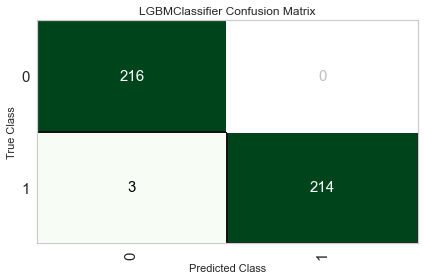

In [32]:
plot_model(clf_model, plot='confusion_matrix')

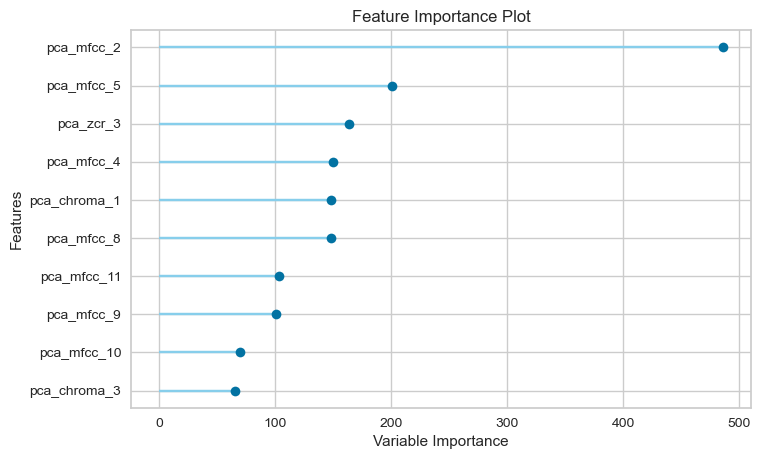

In [33]:
plot_model(clf_model, plot = 'feature')

In [35]:
 ## plot_model(clf_model, plot='auc')

In [36]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df, target = 'gender', train_size = 0.7)

,Description,Value
0,Session id,3186
1,Target,gender
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [37]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9977,0.9999,0.9954,1.0000,0.9977,0.9954,0.9954


In [38]:
## PREDICTING THE MODEL

predict_holdouts = predict_model(clf_model)
predict_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9977,0.9999,0.9954,1.0000,0.9977,0.9954,0.9954


,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,gender,prediction_label,prediction_score
1405,11.496999,-9.393417,4.690851,7.376311,0.243167,-5.678664,0.327427,-6.517466,1.958520,-2.567411,...,-5.133089,-1.907385,-7.418028,-8.027740,-3.126961,1.304035,5.062522,0,0,1.0000
887,34.711414,26.021748,4.700994,4.385336,1.220808,3.575826,-2.668035,-2.219196,0.067212,-1.247521,...,-4.431033,-2.633641,-7.557893,-7.935981,-3.948678,5.590844,6.839816,1,1,0.9998
274,238.691055,13.978136,-4.338783,-11.898719,1.695040,1.565817,-2.480246,1.296778,-1.044069,5.249601,...,-105.166344,-541.200562,-223.701904,-693.142639,278.038422,587.066650,-699.139343,1,1,0.9999
1122,132.090164,-14.014651,-21.003407,6.655333,0.474530,-4.107851,4.206163,11.335571,-0.276150,8.666646,...,20.292692,-6.224073,-7.891372,-7.361908,-0.236582,1.120176,0.193396,1,1,0.9952
1013,24.200418,17.509010,-20.325481,-1.786474,10.283898,1.588650,-5.443382,-0.326166,-3.345570,-0.747075,...,-4.838747,-2.683620,-8.328536,-9.686153,-3.101258,3.010239,7.663899,1,1,0.9983


In [39]:
## SAVING THE MODEL 
save_model(clf_model_hypertune, model_name = "best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [40]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

In [41]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

In [42]:
from sklearn import set_config
set_config(display = "text")

In [43]:
## GET CONFIG / SET CONFIG

X_train = get_config('X_train')
X_train.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_11,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20
822,97.824921,-32.160267,-10.137754,6.110879,-12.780035,6.628919,13.750022,-2.451960,-2.169785,-1.692635,...,-6.016155,-7.584085,1.319811,1.174832,-2.321003,-2.742555,1.217008,-7.110647,5.066217,0.326982
776,-28.730177,-0.537192,-5.247578,-3.434344,0.037184,-0.093292,-1.402999,5.886032,2.334132,3.467685,...,-9.625059,-11.999551,-6.120641,-4.335764,-3.287757,-8.502152,-9.024917,-0.626199,4.141167,8.325075
944,-37.445015,-4.059790,3.459010,-6.524758,-2.132287,-0.458881,2.229176,-1.010792,-0.453578,4.744843,...,-9.740909,-12.088086,-6.086848,-3.794680,-3.291717,-8.964853,-10.276503,-3.021285,3.607818,7.895082
922,-91.938042,-13.023728,3.415509,-7.225471,0.271892,6.605428,0.105676,-5.236531,1.528702,6.698334,...,-9.831183,-12.330304,-5.967938,-5.239708,-2.978370,-8.963125,-10.437579,-2.969835,3.803510,7.761700
1159,176.165451,-27.580387,-10.139683,5.740581,-11.271717,4.274435,1.228851,-0.451681,-13.896483,-1.287464,...,40.230801,154.883926,-13.375056,14.561493,275.297424,89.647491,-82.551712,44.446075,50.168297,42.191425


In [44]:
X_train.shape

(1007, 118)

In [45]:
get_config('seed')

3186

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

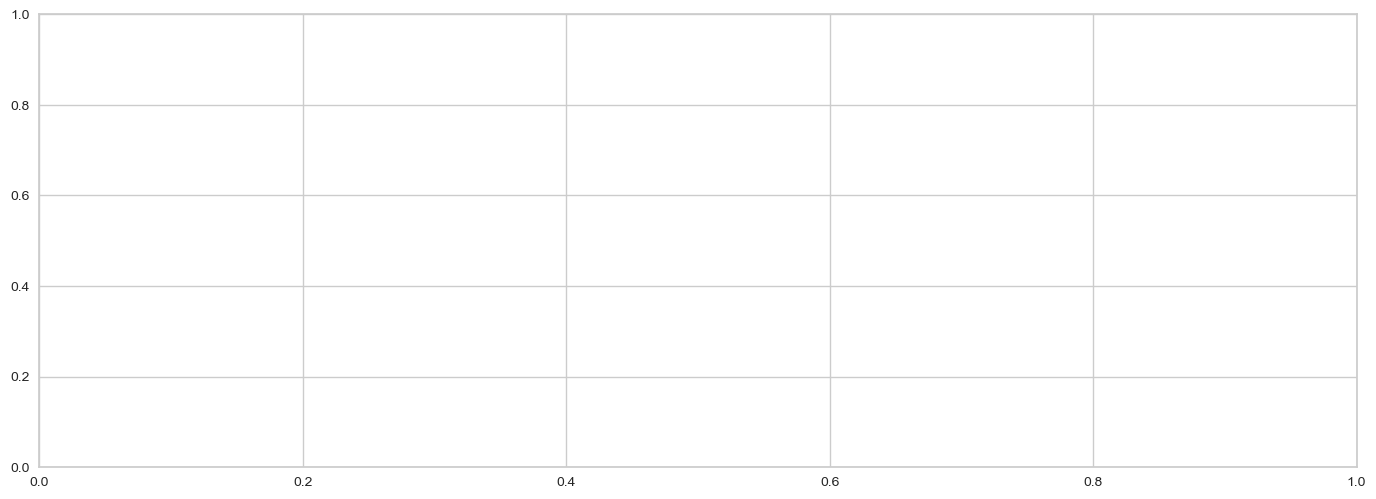

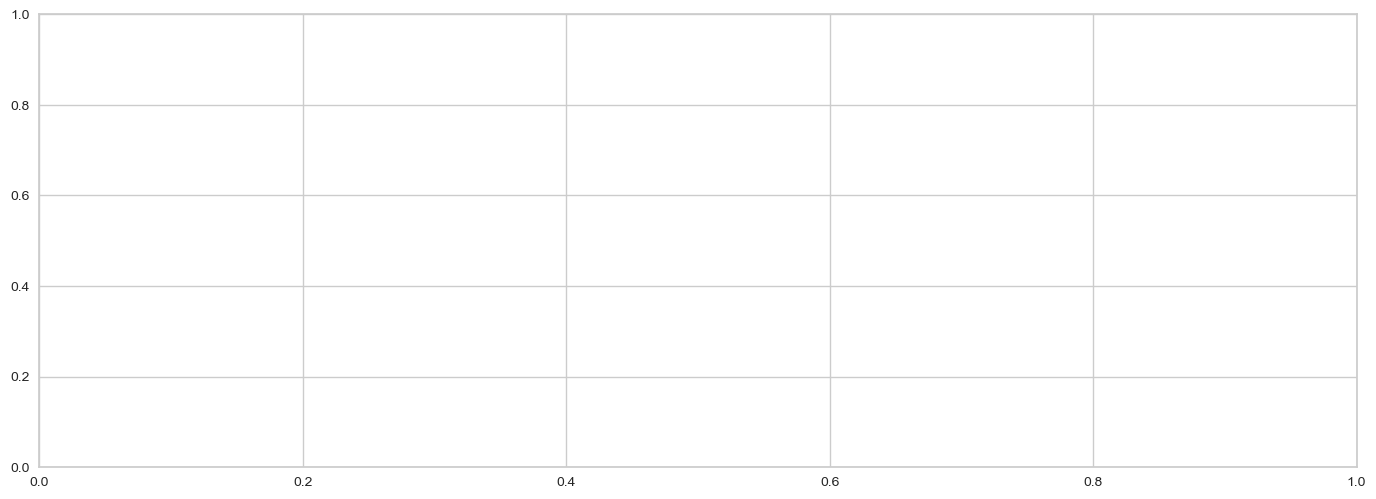

In [47]:
evaluate_model(clf_model)